In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data-Cleaning :-

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# checking Columns_Name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# checking Describe :-
df.describe(include="object").T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Detection Of Missing Values :-

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Missing-value %
for i in df.columns:
    if df[i].isnull().sum()>1:
        print(i,"...........",df[i].isnull().sum()*100/df.shape[0],"%.......",df[i].dtype)

director ........... 29.908027705234474 %....... object
cast ........... 9.367548540933349 %....... object
country ........... 9.43567616668559 %....... object
date_added ........... 0.11354604292040422 %....... object
rating ........... 0.04541841716816169 %....... object
duration ........... 0.034063812876121265 %....... object


## Treatment of Missing Value:-¶

In [10]:
df["director"].replace(np.nan,"No Director",inplace=True)
df["cast"].replace(np.nan,"No Cast",inplace=True)
df["country"].replace(np.nan,"No Country",inplace= True)

df.dropna(subset=["date_added"], axis=0, inplace = True)
df.dropna(subset=["rating","duration"],axis=0, inplace = True)

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Derived catagory From "Listed_in" Column 

In [13]:
gg=df["listed_in"].str.split(",",expand=True)
gg

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [14]:
df["catagory"]=gg[0]

In [15]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,catagory
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",Cult Movies
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,No Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kids' TV
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies


In [16]:
# Q1.Total No. of Moives & Tv Shows :-
no=df["type"].value_counts()
no

Movie      6126
TV Show    2664
Name: type, dtype: int64

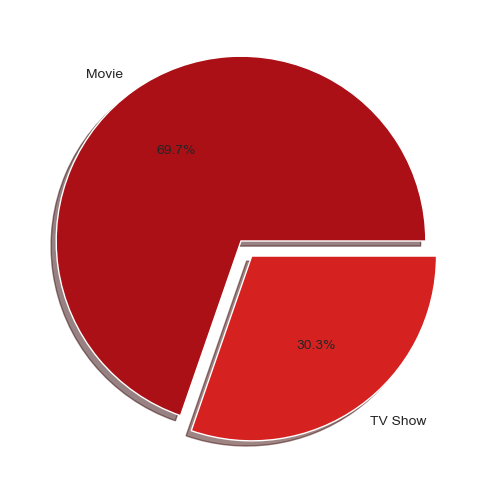

In [17]:
plt.figure(figsize=(12,6),)
sns.set_style("white")
color=sns.color_palette("Reds_r")
plt.pie(no,labels=no.index,autopct="%0.1f%%",explode=[0,0.1],shadow=True,colors=color);

In [18]:
movie=df[df["type"]=="Movie"]


In [19]:
tv=df[df["type"]=="TV Show"]


In [20]:
# Q2. Top 10 Directors On Netflix 

top_10_Dir= df["director"].value_counts().sort_values(ascending=False)[1:11]
top_10_Dir=top_10_Dir.reset_index()
top_10_Dir

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


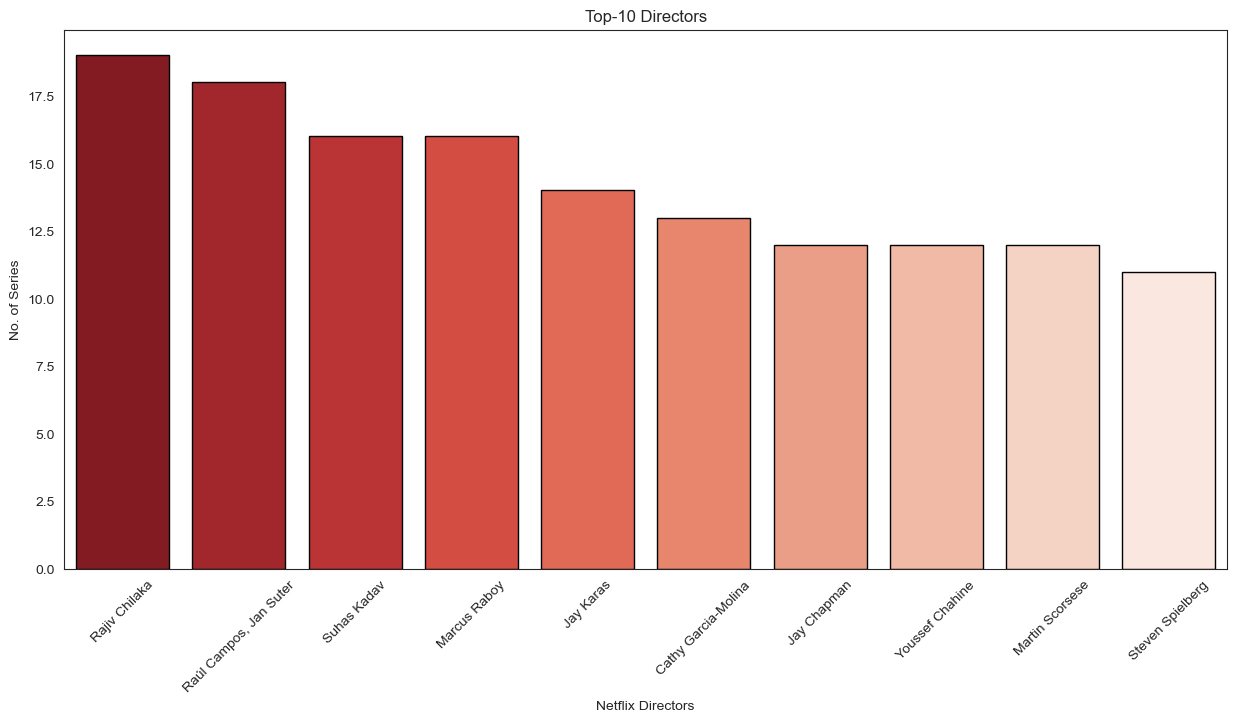

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(x=top_10_Dir["index"],y=top_10_Dir["director"],data=top_10_Dir,palette="Reds_r",edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Netflix Directors")
plt.ylabel("No. of Series")
plt.title("Top-10 Directors");

In [22]:
# Q.3Top Country Of With The Most Amount Of Content On Netflix :-
top_10=df["country"].value_counts().sort_values(ascending=False).head(10)
top_10

United States     2809
India              972
No Country         829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'No Country'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Japan'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Mexico')])

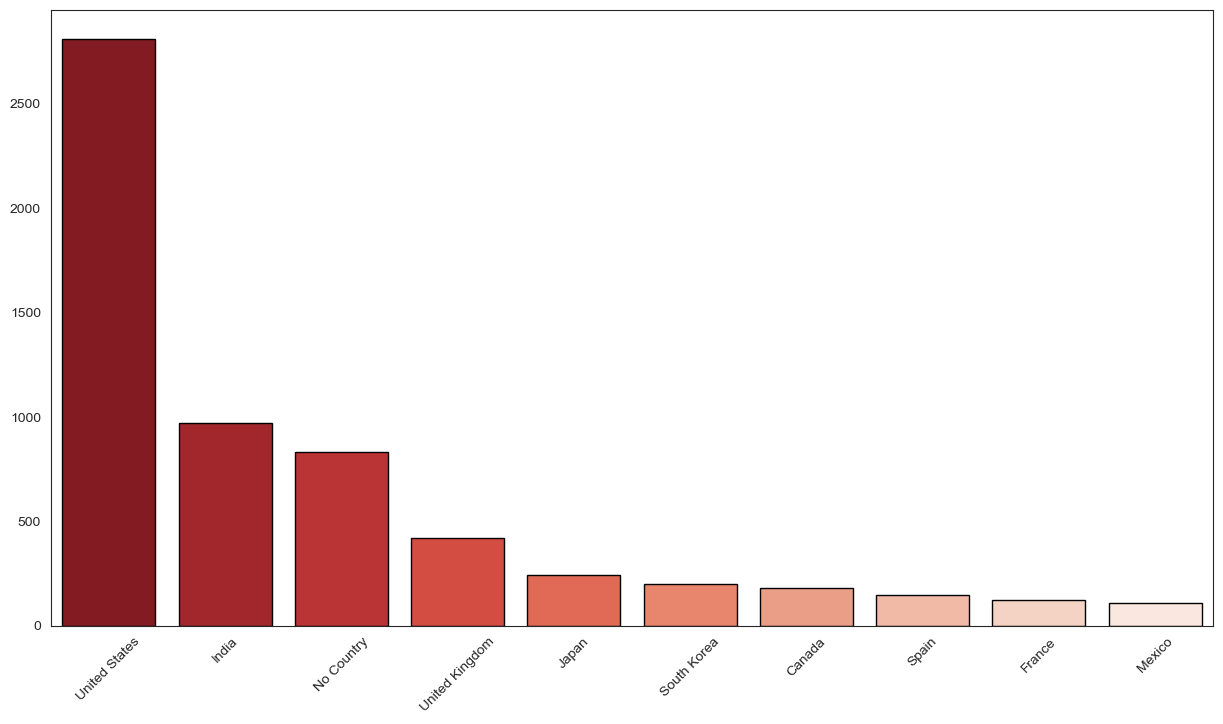

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(top_10.index,top_10.values,palette="Reds_r",estimator=sum,edgecolor="black")
plt.xticks(rotation=45)

In [24]:
# Q.4Content distribution based on Rating :-
rating=df["rating"].value_counts().sort_values(ascending=False)
rating

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

<AxesSubplot:>

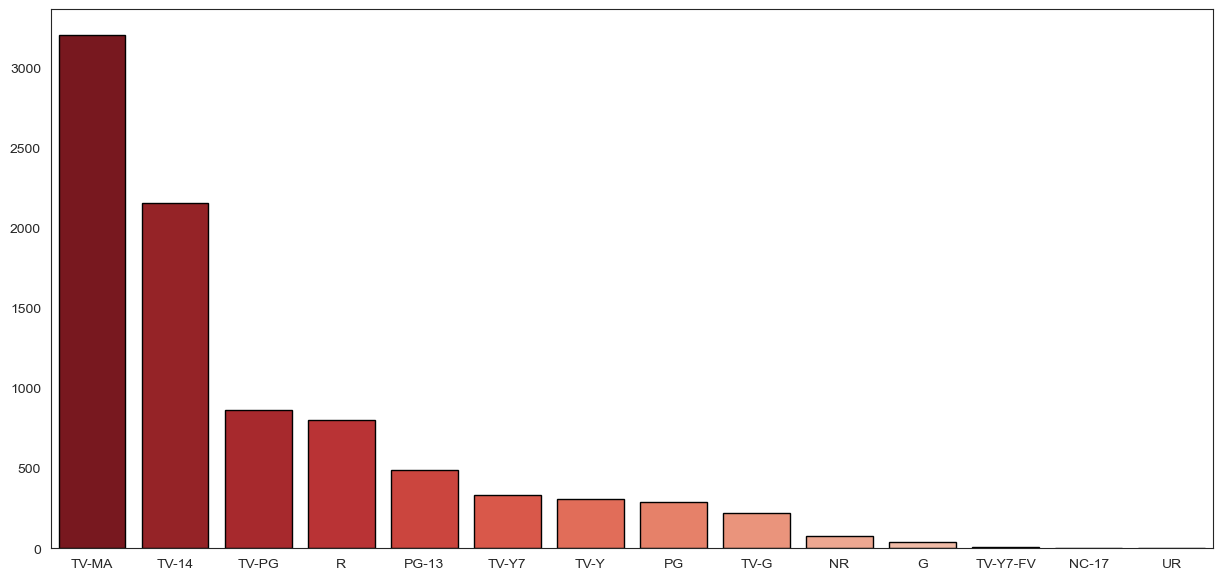

In [25]:
plt.figure(figsize=(15,7))
sns.barplot(rating.index,rating.values,estimator=sum,palette="Reds_r",edgecolor="black")

## Moives And Tv Show's Year-wise Trends :-

In [26]:
# Q5.Moives And Tv Show's Year-wise Trends :-
data1=movie.groupby(["release_year"])["release_year"].count().sort_values()
data1

release_year
1963      1
1966      1
1946      1
1947      1
1961      1
       ... 
2020    517
2019    633
2016    658
2017    765
2018    767
Name: release_year, Length: 73, dtype: int64

In [27]:
data2=tv.groupby(["release_year"])["release_year"].count().sort_values()
data2

release_year
1925      1
1991      1
1989      1
1981      1
1979      1
1977      1
1985      1
1972      1
1967      1
1963      1
1946      1
1945      1
1974      1
1995      2
1986      2
1988      2
1994      2
1990      3
1992      3
1996      3
2000      4
1998      4
1993      4
1997      4
2001      5
1999      7
2002      7
2003      8
2004      9
2005     13
2007     14
2006     14
2008     22
2009     34
2010     39
2011     40
2013     61
2012     63
2014     88
2015    159
2016    243
2017    265
2021    315
2018    379
2019    397
2020    436
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Netflix Movies & Tv Shows Trends Over The Years')

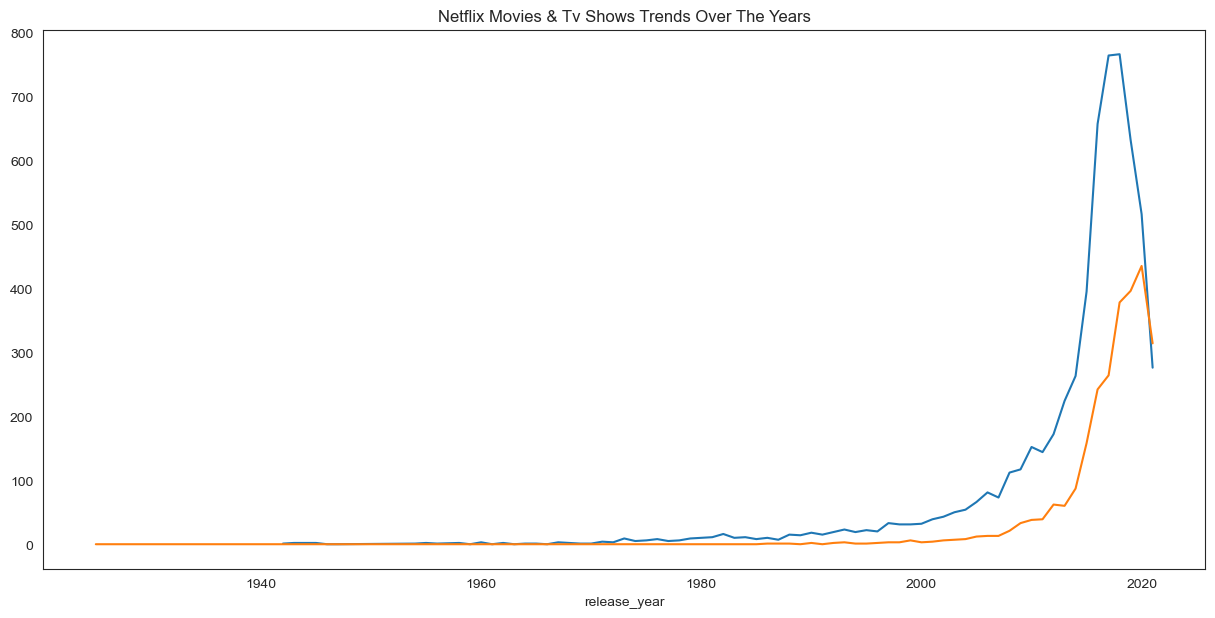

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(x=data1.index,y=data1.values)
sns.lineplot(x=data2.index,y=data2.values)
plt.title("Netflix Movies & Tv Shows Trends Over The Years")

## Frequency Of Tv-Shows and Movies From "2010" :-

In [29]:
#Q.6Frequency Of Tv-Shows and Movies From "2010" :-
data=df[df["release_year"]>=2010]
data1=data.groupby(["release_year","type"])["release_year"].count()
dataa=data1.to_frame().rename(columns={"release_year":"Count"}).reset_index()
dataa

,release_year,type,Count
0,2010,Movie,153
1,2010,TV Show,39
2,2011,Movie,145
3,2011,TV Show,40
4,2012,Movie,173
5,2012,TV Show,63
6,2013,Movie,225
7,2013,TV Show,61
8,2014,Movie,264
9,2014,TV Show,88


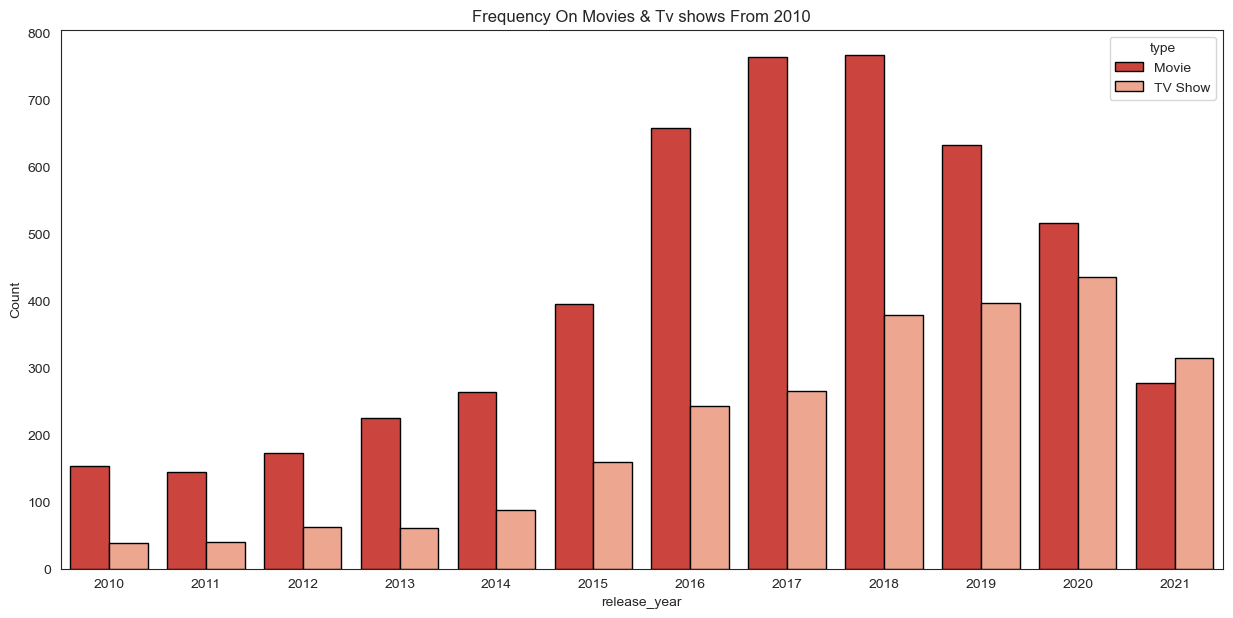

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x=dataa["release_year"],y=dataa["Count"],hue=dataa["type"],palette="Reds_r",edgecolor="black",estimator=sum)
plt.title("Frequency On Movies & Tv shows From 2010")
plt.show()

In [31]:
# Q.7 Oldest Indian Content/Moives On Netflix :-
india=df[df["country"]=="India"]
india1=india[india["release_year"]<2000][["title","release_year",]].sort_values(by="release_year")
india1

,title,release_year
542,Ujala,1959
5400,Professor,1962
7932,Sangam,1964
5391,Amrapali,1966
5461,Prince,1969
...,...,...
6936,Haseena Maan Jaayegi,1999
2969,Together For Eternity,1999
1944,Mann,1999
8144,Taal,1999


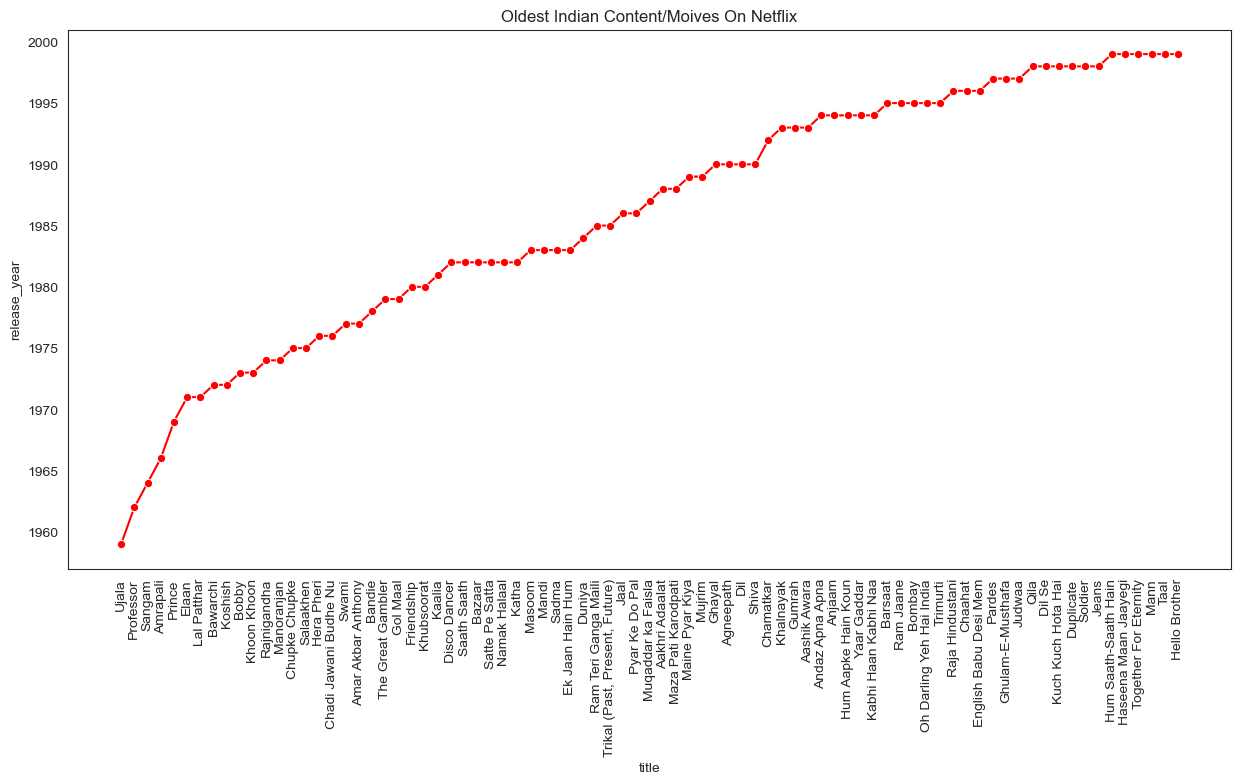

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(x="title",y="release_year",data=india1,marker="o",color="red",)
plt.title("Oldest Indian Content/Moives On Netflix")
plt.xticks(rotation=90);

In [33]:
# Q8.Indian Directors With Most of Films On Netflix :
indian_dic=df[df["country"]=="India"]["director"].value_counts()[1:11]
indian_dic

David Dhawan          9
Ram Gopal Varma       7
Rajkumar Santoshi     6
Imtiaz Ali            6
Anees Bazmee          6
Sooraj R. Barjatya    6
Anurag Kashyap        5
Indra Kumar           5
Mahesh Manjrekar      5
Ashutosh Gowariker    5
Name: director, dtype: int64

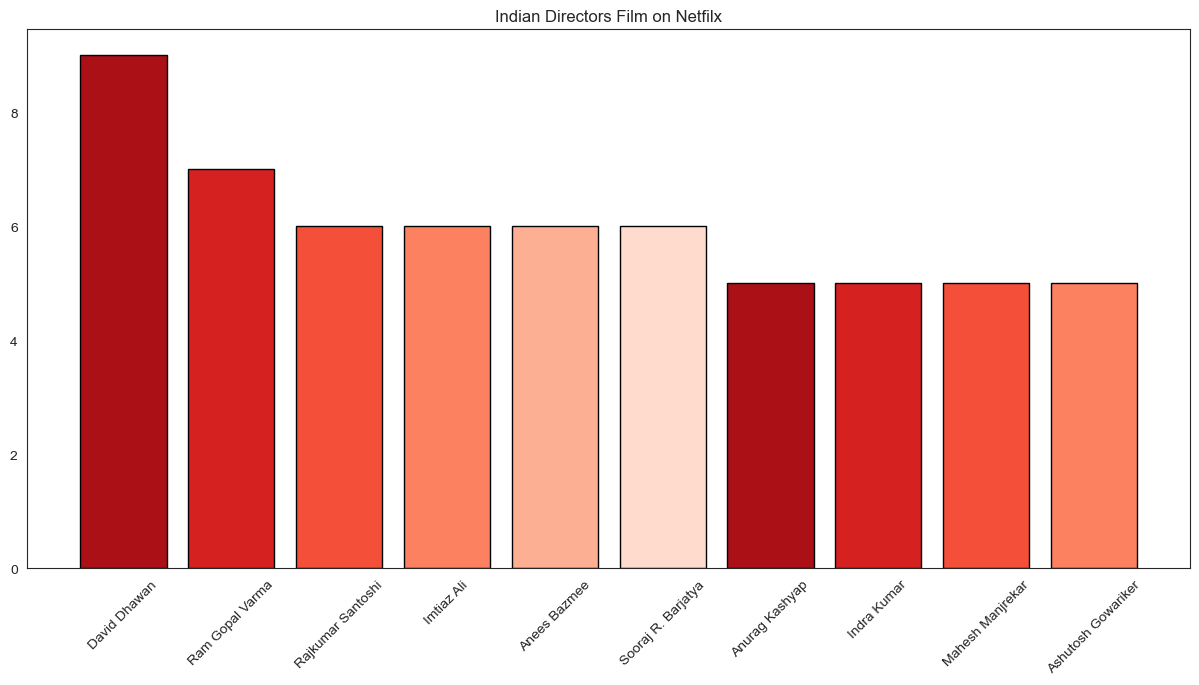

In [34]:
plt.figure(figsize=(15,7))
plt.bar(indian_dic.index,indian_dic.values,color=color,edgecolor="black")
plt.xticks(rotation=45)
plt.title("Indian Directors Film on Netfilx")
plt.show()

In [35]:
# Q9. Most Frequent Rating Of Indian Content On Netflix :-
indian_r=df[df["country"]=="India"]
rating1=indian_r["rating"].value_counts().sort_values(ascending=False)
rating1

TV-14       550
TV-MA       248
TV-PG       134
TV-Y7        14
TV-G          9
TV-Y          5
PG-13         4
NR            4
PG            2
R             1
TV-Y7-FV      1
Name: rating, dtype: int64

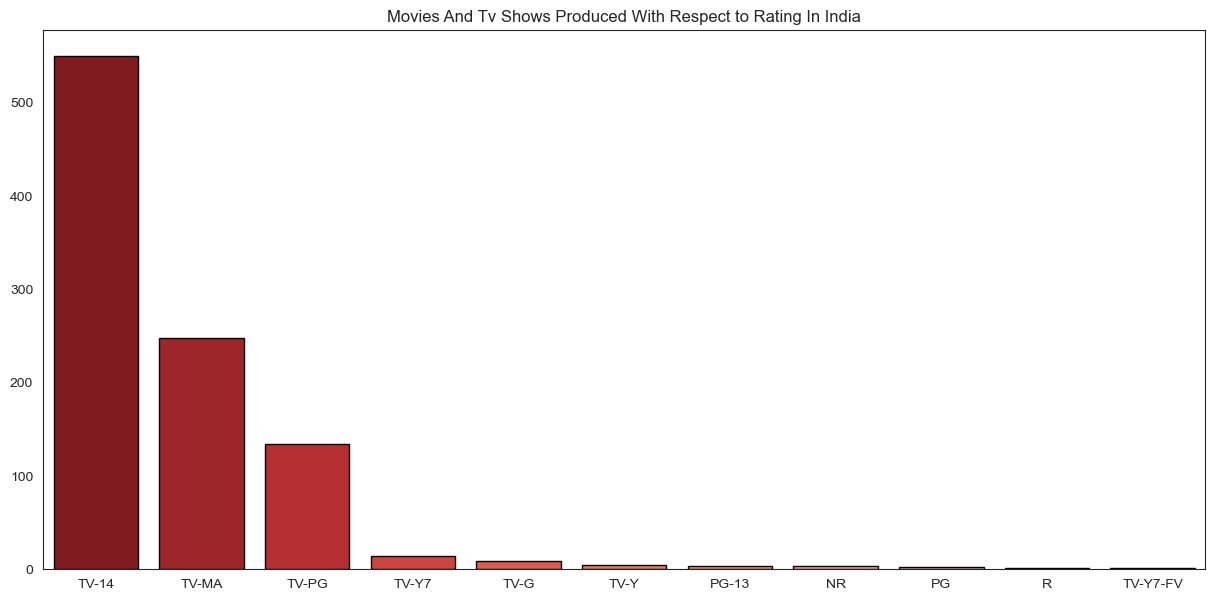

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(rating1.index,rating1.values,estimator=sum,palette="Reds_r",edgecolor="black")
plt.title("Movies And Tv Shows Produced With Respect to Rating In India")
plt.show()

## Which Month Has Most No. Releases on Netflix :-

In [37]:
df["date_added"]=df["date_added"].astype("datetime64")

In [38]:
df["Month"]=df.date_added.dt.month_name()

In [39]:
month_count=df.groupby(["Month"])["title"].count().sort_values(ascending=False)
month_count

Month
July         827
December     812
September    769
April        763
October      760
August       754
March        741
January      737
June         728
November     705
May          632
February     562
Name: title, dtype: int64

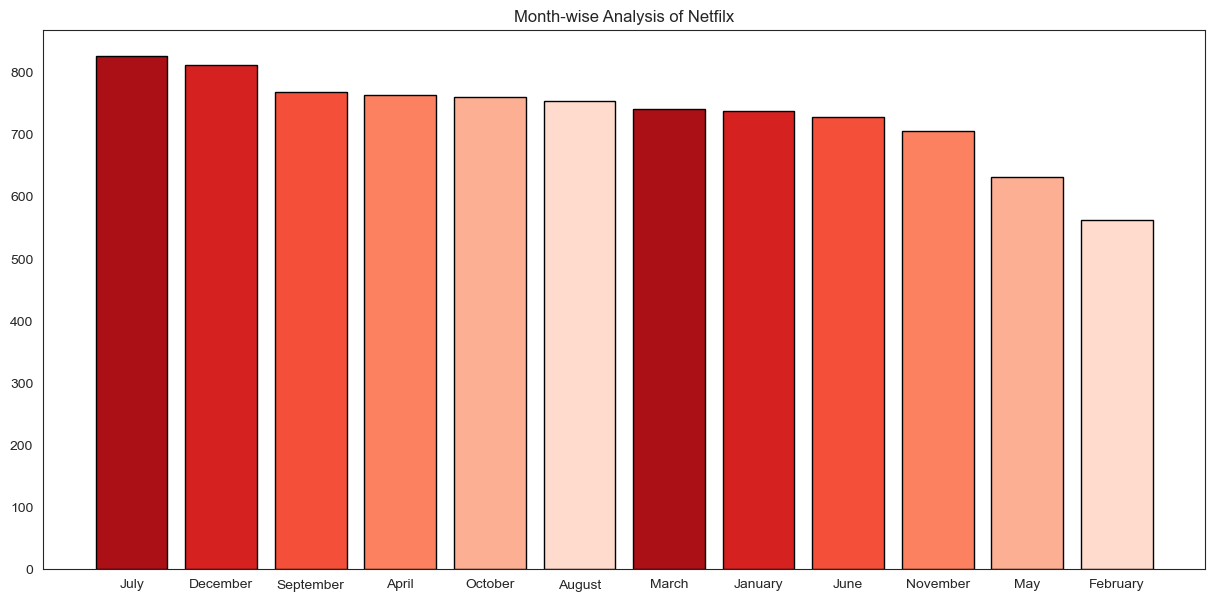

In [40]:
plt.figure(figsize=(15,7))
plt.bar(month_count.index,month_count.values,color=color,edgecolor="black")
plt.title("Month-wise Analysis of Netfilx")
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  catagory      8790 non-null   object        
 13  Month         8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 1.0+ MB


In [42]:
# Q11 Most indian actor most tv show

ll=df["cast"].str.split(",")
ll

0                                               [No Cast]
1       [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2       [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                               [No Cast]
4       [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
                              ...                        
8802    [Mark Ruffalo,  Jake Gyllenhaal,  Robert Downe...
8803                                            [No Cast]
8804    [Jesse Eisenberg,  Woody Harrelson,  Emma Ston...
8805    [Tim Allen,  Courteney Cox,  Chevy Chase,  Kat...
8806    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
Name: cast, Length: 8790, dtype: object

In [43]:
cast=[]
for i in ll:
    for j in i:
        cast.append(j)

In [44]:
cast1=pd.DataFrame(cast)
castt=cast1.value_counts()[1:51].to_frame()
castt=castt.rename(columns={0:"count"}).reset_index()
castt

,0,count
0,Anupam Kher,39
1,Rupa Bhimani,31
2,Takahiro Sakurai,30
3,Julie Tejwani,28
4,Om Puri,27
5,Shah Rukh Khan,26
6,Rajesh Kava,26
7,Yuki Kaji,25
8,Boman Irani,25
9,Andrea Libman,25


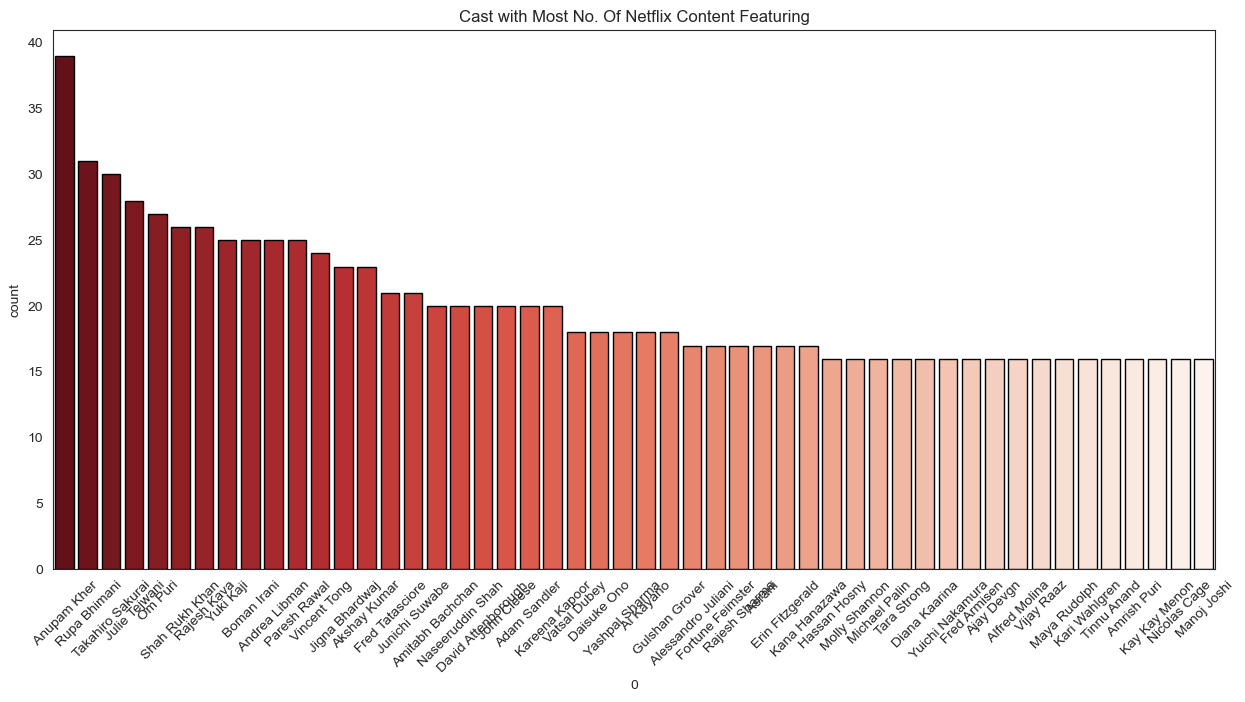

In [45]:
plt.figure(figsize=(15,7))
sns.barplot(x=castt[0],y=castt["count"],data=castt,palette="Reds_r",edgecolor="Black")
plt.xticks(rotation=45)
plt.title("Cast with Most No. Of Netflix Content Featuring")
plt.show()

In [46]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,catagory,Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,September
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,September
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Docuseries,September
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,International TV Shows,September
